In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 2.1 Partial Differential Equation (PDE)

In previous lectures, we learn about solving the differential equations when the functions depend on exactly one variable, i.e. $x$ or $t$. However, the real physical phenomenon may involve more than one variables in the form of partial differential equations. For examples, wave equation, Schrodinger's equation, heat transfer, diffusion, electromanetism, etc. Let's use an example of wave in a string.

___
### 2.1.1 Finite Difference Equations

From the wave course, we know that the wave equation in string is given by:

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = \frac{T}{\mu }\frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

where $T$ and $\mu$ are tension and mass density respectively and $u = u(x, t)$ is the wave function, i.e. displacement of wave as function of position and time.

The second derivative can be approximated by

$$\frac{{{d^2}f(x)}}{{d{x^2}}} = \frac{{f(x + h) - 2f(x) + f(x - h)}}{{{h^2}}} + O({h^3})$$


In two dimensions of $(x,t)$, we impose a rectangular grid in space and time such that

$$\begin{array}{l}
{x_i} = ih\\
{t_j} = j\delta 
\end{array}$$

where $i = 0, 1, 2, ..., N$ and $j = 0, 1, 2, ..., M$

In the finite difference approximation to the wave equation is then:

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} \approx \frac{{{u_{i,j + 1}} - 2{u_{i,j}} + {u_{i,j - 1}}}}{{{\delta ^2}}}$$

$$\frac{{{\partial ^2}u}}{{\partial {x^2}}} \approx \frac{{{u_{i + 1,j}} - 2{u_{i,j}} + {u_{i - 1,j}}}}{{{h^2}}}$$

Substitue these approximation into the wave equation, we have

$$\frac{{{u_{i,j + 1}} - 2{u_{i,j}} + {u_{i,j - 1}}}}{{{\delta ^2}}} = {c^2}\frac{{{u_{i + 1,j}} - 2{u_{i,j}} + {u_{i - 1,j}}}}{{{h^2}}}$$

where $c^2 = T/\mu$, and $c$ is the speed of the wave in string.

If the condition for $u(x, t=0)$ is known, then it is useful to solve for ${{u_{i,j + 1}}}$. Therefore, we will rearrange the equation above to make ${{u_{i,j + 1}}}$ a subject.

$${u_{i,j + 1}} = \frac{{{\delta ^2}{c^2}}}{{{h^2}}}\left( {{u_{i + 1,j}} + {u_{i - 1,j}}} \right) + 2\left( {1 - \frac{{{\delta ^2}{c^2}}}{{{h^2}}}} \right){u_{i,j}} - {u_{i,j - 1}}$$

This equation tells us that if we know $u$ at all $x_i$ at the times $t_j$ and $t_{j-1}$ then we can immediately determine $u$ at all $x_i$ at the next time step, $t_{j+1}$. This is said to be an ***explicit*** method for determining the solutions.

___
### 2.2.2 Type of Boundary conditions

The wave equation is given by

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

Unknown function $u$ depends on $x$ and $t$. To solve this, wee need to know the initial and boundary conditions:

- Initial condition for $u(x,0)$
- Initial condition for $u_t(x,0)$
- Boundary condition at $x=0$
- Boundary condition at $x=L$

#### Initial conditions

Most problem we will know the function:

$$u(x, 0) = f(x)$$.

If the wave if initially at rest, then we also know that

$$\frac{\partial}{\partial t}u(x,0) = 0$$


#### Boundary conditions
#### 1. Fixed boundaries

At $x=0$ we will sometimes use the condition $u=0$, often known as a homogeneous **Dirichlet** condition. This condition will mirror the wave.

#### 2. Feeding a wave from the boundary

We shall demonstrate the effect of moving $u$ at the boundary $x=0$ to feed the domain with an incoming wave. This is another type of **Dirichlet** condition. The boundary condition then reads

$$u(0,t) = U_0(t)$$

for some given function $U_0(t)$. A particular choice in a later demonstration is a sine function that is active in three different time intervals:

$$U_0 (t) = \left\lbrace\begin{array}{ll}
\frac{1}{4}\sin(6\pi t),& t\in T\\
0,& \hbox{otherwise}
\end{array}\right.$$

The movement of $u$ at the boundary will produce a wave that is by the PDE transported to the right into the domain.

There is a small difficulty in the starting the solution since we usually won't know $u$ at two successive time steps. Rather, we might know $u(x_i, 0)$ and the derivative $\frac{{\partial u({x_i},0)}}{{\partial t}}$ at all $x_i$. Then we have

#### 3. Reflecting condition

At $x=0$ and/or $x=L$ we will apply a reflecting or no-flux condition:

$$\frac{\partial u}{\partial x}=0$$

This condition reflects the wave into the domain again, as a surface wave hits a vertical wave, runs up to the double amplitude, and propagates back into the domain again. This type of boundary condition is also referred to as a **Neumann** condition.

#### 4. Open boundary condition
Very often one wants to let a wave travel through the boundary without being disturbed. Such a condition is called an open boundary condition, or a radiation condition, or an artificial boundary condition:

$$\begin{align}
\frac{\partial u}{\partial t} - c\frac{\partial u}{\partial x} &= 0,\quad x=0,
\\\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} &= 0,\quad x=L
\end{align}$$

These conditions work exactly in 1D, but are challenging to generalize and implement in 2D and 3D.

$${\left. {\frac{{\partial u({x_i},t)}}{{\partial t}}} \right|_{t = 0}} = \frac{{{u_{i,1}} - {u_{i, - 1}}}}{{2\delta }}$$

or 

$${u_{i, - 1}} = {u_{i,1}} - 2\delta {\left. {\frac{{\partial u({x_i},t)}}{{\partial t}}} \right|_{t = 0}}$$

___
### 2.2.3 Putting It All Together

Assuming, the boundary condition on both ends are fixed to 0.

With this expression for ${u_{i, - 1}}$, we can write the $j = 0$ case of the recurring equation for ${u_{i, j+ 1}}$, i.e. the solution at the first time step, as:

$$ {u_{i,1}} = \frac{{{\delta ^2}{c^2}}}{{{h^2}}}\left( {{u_{i + 1,0}} + {u_{i - 1,0}}} \right) + 2\left( {1 - \frac{{{\delta ^2}{c^2}}}{{{h^2}}}} \right){u_{i,0}} - {u_{i,1}} + 2\delta \frac{{\partial u({x_i},0)}}{{\partial t}} $$

or 

$$ {u_{i,1}} = \frac{{{\delta ^2}{c^2}}}{{2{h^2}}}\left( {{u_{i + 1,0}} + {u_{i - 1,0}}} \right) + \left( {1 - \frac{{{\delta ^2}{c^2}}}{{{h^2}}}} \right){u_{i,0}} + \delta \frac{{\partial u({x_i},0)}}{{\partial t}} $$

Now we have equation for iterating the first step, and equation for iterating all steps after that. So, let's implement.

___
**Exercise 1:** 

Initially, we deform the string so that it has a "bump" in the middle,

$$u(x,0) = \left\{ {\begin{array}{*{20}{c}}
{\begin{array}{*{20}{c}}
{0,}\\
{{e^{ - 100{{(x - 0.5)}^2}}},}\\
{0,}
\end{array}}&{\begin{array}{*{20}{c}}
{x = 0}\\
{0 < x < 1}\\
{x = 1}
\end{array}}
\end{array}} \right.$$

Given that at $x=0$ the wave is mirrored (reversed phase or fixed boundary) but at $x=L=1$ the wave is reflecting condition (no reversed phase)

Plot a time-animated graph to demonstrate this.

and it is motionless at $t=0$. Take $c^2 = 10000$, $l = 1 m$ $h=1$ and $\delta = 0.0001$

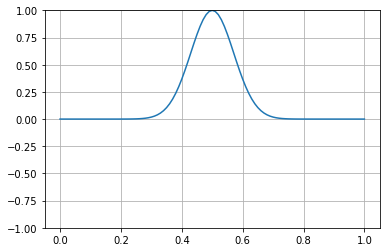

In [4]:
# Set up an array of ux0
x = np.linspace(0, 1., num=101, endpoint=True)
Ux0 = np.exp(-100. * (x - 0.5)**2)

# ensuring both ends are fixed at zero
Ux0[0] = 0
Ux0[100] = 0

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(101)

dt = 0.0001  # Set up time step size
dh = 0.01  # Spatial step size
c = 100
eps = ((dt*c / dh)**2)


# Calculate time step j = 1
Uxj = np.zeros(101)
for i in np.linspace(1, 99, 99, dtype=int):
    Uxj[i] = 0.5 * eps * (Ux0[i+1] + Ux0[i-1]) + \
        (1. - eps) * (Ux0[i]) + dt * dUx0[i]

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-1, 1])

for j in range(200):
    Unew = np.zeros(101)
    for i in np.linspace(1, 99, 99, dtype=int):
        Unew[i] = eps * (Uxj[i+1] + Uxj[i-1]) + 2. * \
            (1. - eps) * Uxj[i] - Uold[i]
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew])
    # if j > 30:
    #    plt.plot(x, Unew)


def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,


plt.grid()
line_ani = animation.FuncAnimation(
    fig1, update_line, 200, fargs=(l), interval=20, blit=True)
line_ani.save('wave-in-string.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

---
**Exercise 2:** 

Try the same problem as **Exercise 1** but use $u(x, 0) = 0$ for all $x$ as initial condition.

The boundary condition at $x = 0$ is the **feeding wave into the string condition**, which is given by: 

$$u(0, t) = \left\lbrace\begin{array}{ll}
2\sin(8\pi t),& t\in {0, \frac{1}{4}}\\
0,& \hbox{otherwise}
\end{array}\right.$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

Plot a time-animated graph to demonstrate this.